In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("C://Users//joshu//Downloads//Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")

In [6]:
print(df.head())  # Shows the first 5 rows
print(df.info())  # Shows column names and data types

         Date   Open   High    Low  Close  Volume  Stock Trading
0  2016-12-30  42120  42330  41700  41830  610000    25628028000
1  2016-12-29  43000  43220  42540  42660  448400    19188227000
2  2016-12-28  43940  43970  43270  43270  339900    14780670000
3  2016-12-27  43140  43700  43140  43620  400100    17427993000
4  2016-12-26  43310  43660  43090  43340  358200    15547803000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB
None


In [7]:
df = df.dropna() 

In [8]:
print(df.head())  # Shows the first 5 rows
print(df.info())  # Shows column names and data types

         Date   Open   High    Low  Close  Volume  Stock Trading
0  2016-12-30  42120  42330  41700  41830  610000    25628028000
1  2016-12-29  43000  43220  42540  42660  448400    19188227000
2  2016-12-28  43940  43970  43270  43270  339900    14780670000
3  2016-12-27  43140  43700  43140  43620  400100    17427993000
4  2016-12-26  43310  43660  43090  43340  358200    15547803000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB
None


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Open", "High", "Low", "Close", "Volume"]])


In [10]:
from sklearn.model_selection import train_test_split

X = df[["Open", "High", "Low", "Volume"]]  # Features
y = (df["Close"].shift(-1) > df["Close"]).astype(int)  # Target: 1 if price goes up, 0 otherwise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7439024390243902
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       147
           1       0.65      0.79      0.71        99

    accuracy                           0.74       246
   macro avg       0.74      0.75      0.74       246
weighted avg       0.76      0.74      0.75       246



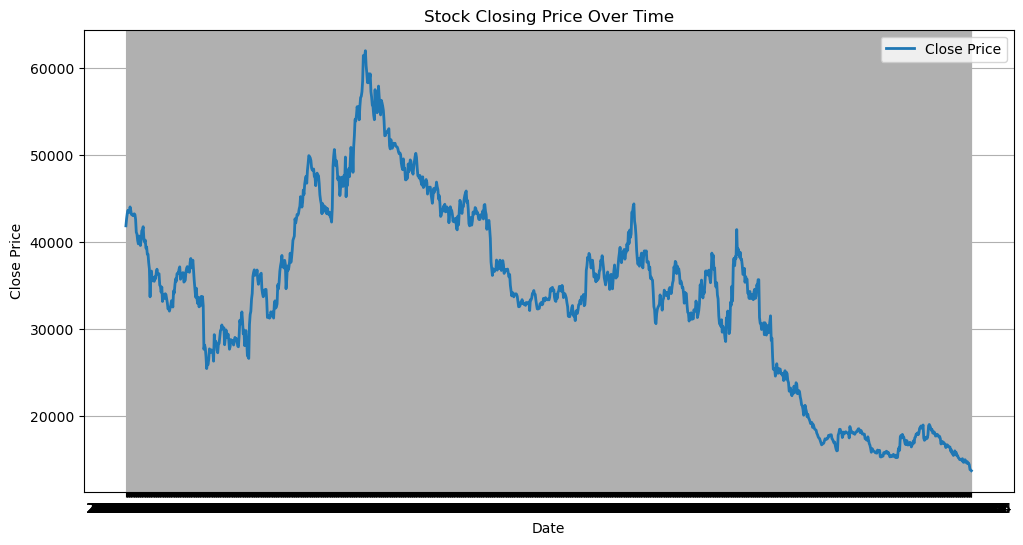

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


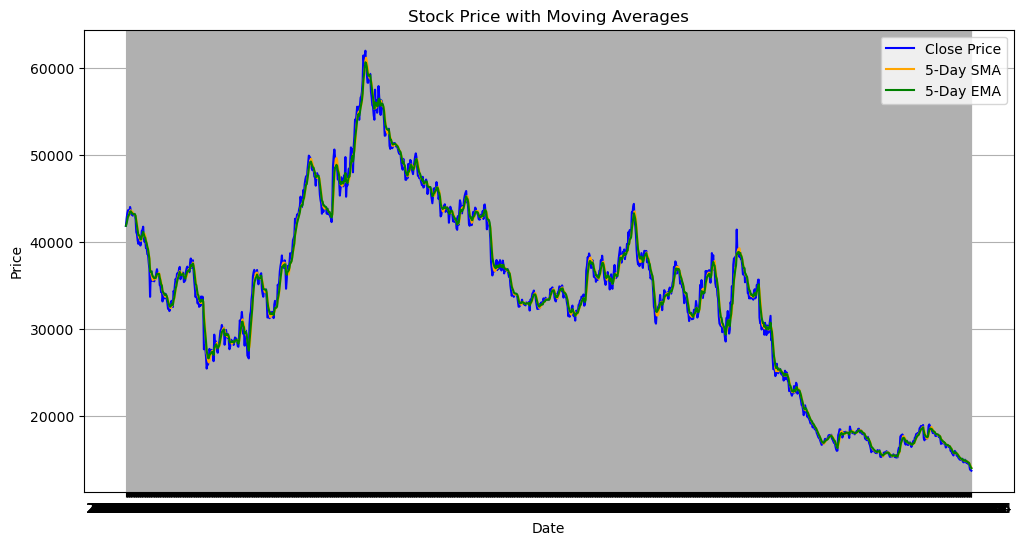

In [14]:
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['SMA_5'], label='5-Day SMA', color='orange')
plt.plot(df['Date'], df['EMA_5'], label='5-Day EMA', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


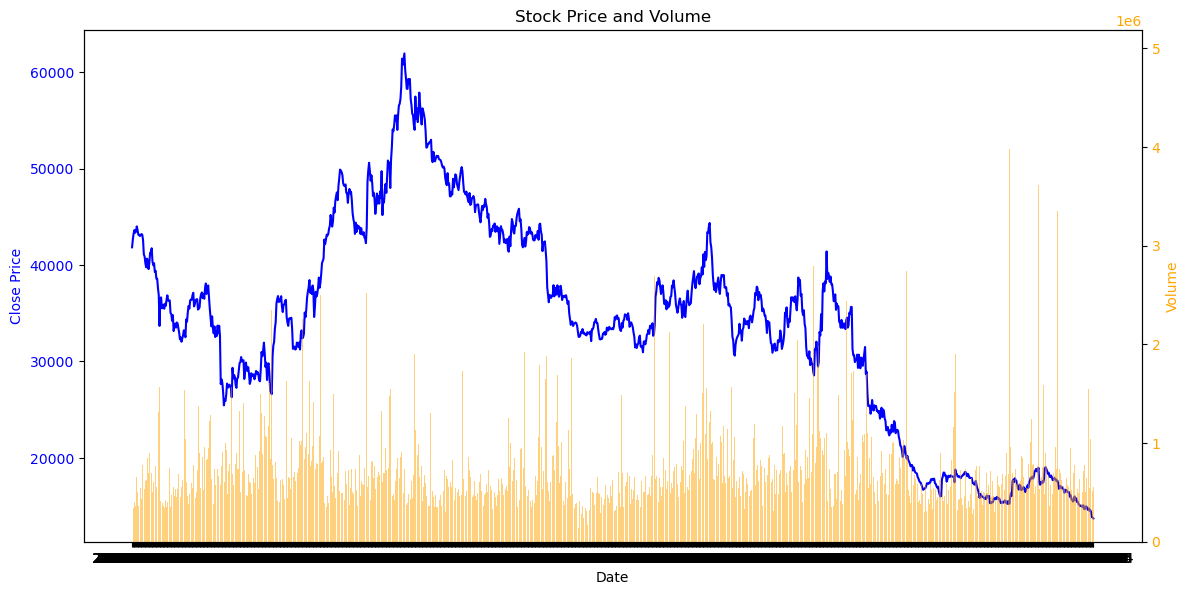

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Close Price
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Volume on the secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='orange')
ax2.bar(df['Date'], df['Volume'], color='orange', alpha=0.5, label='Volume')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.title('Stock Price and Volume')
plt.show()


In [16]:
import numpy as np

X = []
y = []

for i in range(30, len(df)):
    X.append(df.iloc[i-30:i][["Open", "High", "Low", "Close", "Volume", "SMA", "EMA", "RSI", "MACD", "P/E", "EPS Growth", "News Score", "Reddit Score"]].values)
    # Assume `target` column is already labeled with 1 (Buy), 0 (Hold), -1 (Sell)
    y.append(df.iloc[i]["target"])

X = np.array(X)  # Shape: (num_samples, 30, num_features)
y = np.array(y)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(30, len(X[0][0]))))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Output: 3 classes (Buy, Hold, Sell)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print(classification_report(y_test_labels, y_pred_labels))


KeyError: "['SMA', 'EMA', 'RSI', 'MACD', 'P/E', 'EPS Growth', 'News Score', 'Reddit Score'] not in index"